In [21]:
from math import exp,sqrt
import numpy as np
def f(u,v):
    return exp(u) + exp(2*v) + exp(u*v) + u**2 -2 * u * v + 2*v**2-3*u-2*v
def f_du(u,v):
    return exp(u) + v*exp(u*v) + 2*u -2*v -3
def f_dv(u,v):
    return 2*exp(2*v) + u*exp(u*v) -2 * u + 4*v-2
def f_duu(u,v):
    return exp(u) + v ** 2 * exp(u*v) + 2 
def f_dvv(u,v):
    return 4 * exp(2*v) + u**2 * exp(u*v) + 4
def f_duv(u,v):
    return u * v * exp(u*v) - 2
def hessian(u,v):
    return np.array([[f_duu(u,v),f_duv(u,v)],[f_duv(u,v),f_dvv(u,v)]])

### Q7

In [17]:
u,v = (0,0)
eta = 1e-2
for t in range(5):
    du = f_du(u,v)
    dv = f_dv(u,v)
    u -= eta * du
    v -= eta * dv
print(f(u,v))

2.8250003566832635


### Q8

In [19]:
u,v = (0,0)
print(f_duu(u,v)/2,f_dvv(u,v)/2,f_duv(u,v)/2,f_du(u,v),f_dv(u,v),f(u,v))

1.5 4.0 -1.0 -2.0 0.0 3.0


### Q10 (wrong...= =)

In [30]:
u,v = (0,0)
eta = 1e-2
for t in range(5):
    dir_vec = np.dot(np.linalg.inv(hessian(u,v)),np.array([f_du(u,v),f_dv(u,v)]))
    u -= eta * dir_vec[0]
    v -= eta * dir_vec[1]
    print(u,v)
print(f(u,v))

0.008 0.002
0.015875368841068892 0.003954873057304945
0.023628459864096795 0.005865653724366583
0.031261576905142315 0.00773335281654662
0.03877697507307178 0.009558957751435304
2.9247074094504764


In [1]:
%load_ext autoreload
%pylab inline
%autoreload 2
from util import *
from Regression import *
colors = ['orange','blue']

Populating the interactive namespace from numpy and matplotlib


### Q13

0.5054540000000001


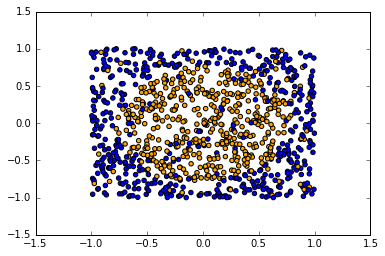

In [2]:
X,y = gen_data(1000)
scatter((X.T)[0],(X.T)[1],c=[colors[int(yi*0.5 + 0.5)] for yi in y])
res = []
for t in range(1000):
    X,y = gen_data(1000)
    X = pad_one(X)
    model = LinearReg(X.shape[1])
    model.fit(X,y)
    Ein = (np.where(np.sign(model.pred(X)) != y)[0].shape[0])/X.shape[0]
    res.append(Ein)
print(np.mean(np.array(res)))

### Q14 & Q15

In [5]:
res = []
w = np.zeros(6)
for t in range(1000):
    X,y = gen_data(1000)
    X = feat_transform(pad_one(X))
    model = LinearReg(X.shape[1])
    model.fit(X,y)
    
    X_te,y_te = gen_data(1000)
    X_te = feat_transform(pad_one(X_te))
    w += model.w
    Eo = (np.where(np.sign(model.pred(X_te)) != y_te)[0].shape[0])/X_te.shape[0]
    res.append(Eo)
print(np.mean(np.array(res)))
print(w/1000)

0.121684
[-1.00326512e+00  2.41399051e-03 -1.63981508e-04 -6.98953952e-05
  1.57128490e+00  1.57711106e+00]


In [6]:
X_tr,y_tr = read_data('hw3_train.dat')
X_tr = pad_one(X_tr)
X_te,y_te = read_data('hw3_test.dat')
X_te = pad_one(X_te)

### Q18

In [7]:
model = LogisticReg(X_tr.shape[1])
model.fit(X_tr,y_tr,1e-3,2000)
Eo = (np.where(model.pred(X_te) != y_te)[0].shape[0])/X_te.shape[0]
print(Eo)

0.475


### Q19

In [8]:
model = LogisticReg(X_tr.shape[1])
model.fit(X_tr,y_tr,1e-2,2000)
Eo = (np.where(model.pred(X_te) != y_te)[0].shape[0])/X_te.shape[0]
print(Eo)

0.22


### Q20

In [9]:
model = LogisticReg(X_tr.shape[1])
model.fit(X_tr,y_tr,1e-3,2000,True)
Eo = (np.where(model.pred(X_te) != y_te)[0].shape[0])/X_te.shape[0]
print(Eo)

0.477
